# 1. Importations des librairies

In [70]:
# 1. importation des librairies
import numpy as np
import pandas as pd

# 2. Chargement des donnees

In [71]:
# 2. chargement des donnees
data = pd.read_csv('Data/studentscores.csv')

In [72]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# 3. Analyse des donnees

In [74]:
# 3. Analyse des donnees
data.isnull().sum() # Vzrifacation des valeurs absentes dans le fichier

Hours     0
Scores    0
dtype: int64

#### data.info()

In [75]:
data['Hours'].max()

np.float64(9.2)

In [76]:
data['Hours'].min()

np.float64(1.1)

In [77]:
print(data['Hours'].max())

9.2


In [78]:
print("Max score : ", data['Scores'].max())

Max score :  95


In [79]:
print("Min score :", data['Scores'].min())

Min score : 17


# 4. Dvision des donnees

## Variables indep et variable Dep

In [80]:
X = data.iloc[ : , : -1].values
y = data.iloc[ : , -1].values

In [81]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [82]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

# 4.1. Separation de donnees : Train et Test

In [83]:
# X_train, X_test, y_train, y_test
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=40)

In [85]:
print("X_train Shape:", X_train.shape)
print("X_test Shape:", X_test.shape)
print("y_ trainShape:", y_train.shape)
print("y_test Shape:", y_test.shape)

X_train Shape: (18, 1)
X_test Shape: (7, 1)
y_ trainShape: (18,)
y_test Shape: (7,)


In [86]:
# Importer l'alogorithme de la Regression Lineaire
from sklearn.linear_model import LinearRegression

In [87]:
modele_lineaire = LinearRegression()

In [88]:
# Entrainement du modèle
modele_lineaire.fit(X_train, y_train)

LinearRegression()

In [89]:
# faire la prediction
y_scores_predicts = modele_lineaire.predict(X_test)

In [90]:
y_test

array([95, 86, 17, 69, 42, 75, 54])

In [91]:
resultats = pd.DataFrame(y_test, y_scores_predicts)

In [92]:
# Evaluation du modèle
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
print("MSE de la regression lineaire:", mean_squared_error(y_test, y_scores_predicts))

MSE de la regression lineaire: 51.90159659147337


In [94]:
print("R2 Score de la regression Lineaire :", r2_score(y_test, y_scores_predicts))

R2 Score de la regression Lineaire : 0.9168569951293908


# 6. Visualisation de Resultats

In [95]:
import matplotlib.pyplot as plt

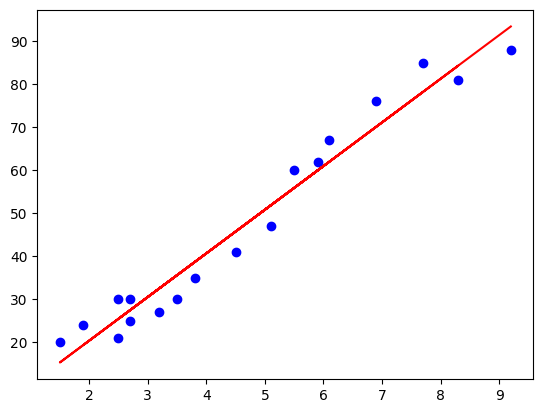

In [96]:
plt.scatter(X_train, y_train, color='blue', label='Train Data')
# plt.plot(X_test, y_scores_predicts, color='red', label='Ligne de la regression')
plt.plot(X_train, modele_lineaire.predict(X_train), color='red', label='Ligne de la regression')
plt.show()

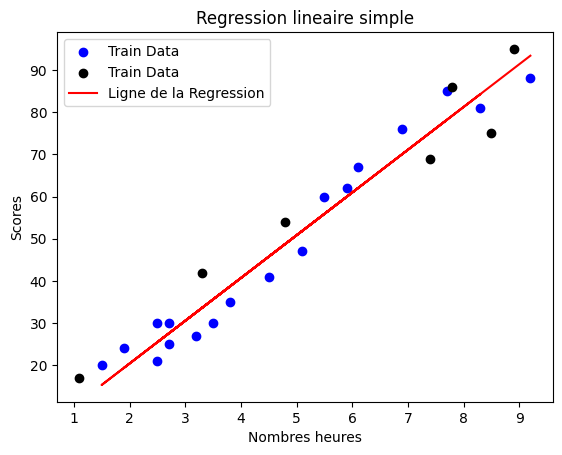

In [107]:
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.scatter(X_test, y_test, color='black', label='Train Data')
plt.plot(X_train, modele_lineaire.predict(X_train), color='red', label='Ligne de la Regression')
plt.xlabel('Nombres heures')
plt.ylabel('Scores')
plt.title('Regression lineaire simple')
plt.legend()
plt.show()

# 7. Prediction simple

In [97]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [98]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

In [101]:
resultats = pd.DataFrame({
    'y-score-reel': y_test, 
    'y-scores-predicts': y_scores_predicts
})
resultats

,y-score-reel,y-scores-predicts
0,95,90.348621
1,86,79.201258
2,17,11.303688
3,69,75.147672
4,42,33.598413
5,75,86.295034
6,54,48.799361


In [102]:
y_scores_predicts

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [106]:
print(modele_lineaire.predict([[10]]))

[101.49598285]


# 8. soustraction 

In [108]:
sub = y_test - y_scores_predicts
sub

array([  4.65137943,   6.79874172,   5.696312  ,  -6.147672  ,
         8.40158743, -11.29503428,   5.20063886])

In [111]:
resultats = pd.DataFrame({
     'y-score-reel': y_test, 
    'y-scores-predicts': y_scores_predicts,
    'reste':sub
})
resultats

,y-score-reel,y-scores-predicts,reste
0,95,90.348621,4.651379
1,86,79.201258,6.798742
2,17,11.303688,5.696312
3,69,75.147672,-6.147672
4,42,33.598413,8.401587
5,75,86.295034,-11.295034
6,54,48.799361,5.200639
